In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pystan
%matplotlib inline

In [2]:
plt.style.use("ggplot")

In [4]:
df=pd.read_excel("./data/real_estate1.xlsx")

In [5]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


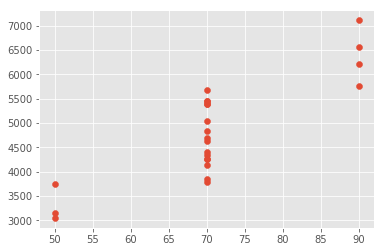

In [7]:
plt.scatter(df["space"],df["value"])

In [33]:
stan_model="""
data {
  int N;
  real X[N];
  real Y[N];
}
parameters{
  real a;
  real b;
  real<lower=0> sigma;
}

model{
  for (n in 1:N){
    Y[n]~normal(a*X[n]+b,sigma);
  }
}
"""

In [34]:
sm=pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_883dd7a4708e1eac5a4d49211bf26a09 NOW.


In [37]:
stan_data={"N":df.shape[0],"X":df["space"],"Y":df["value"]}

In [38]:
fit=sm.sampling(data=stan_data,iter=2000,warmup=500,chains=3,seed=123)

In [39]:
fit

Inference for Stan model: anon_model_883dd7a4708e1eac5a4d49211bf26a09.
3 chains, each with iter=2000; warmup=500; thin=1; 
post-warmup draws per chain=1500, total post-warmup draws=4500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a      77.99    0.33  11.86  53.99   70.6  78.34  85.69 100.49   1277    1.0
b     -692.9   23.85 850.19  -2301  -1243 -718.7 -164.6 1068.0   1271    1.0
sigma 621.72    2.71 106.36 457.19 545.24 607.26 682.49  870.5   1539    1.0
lp__  -152.0    0.04   1.37 -155.5 -152.6 -151.7 -151.0 -150.5   1306    1.0

Samples were drawn using NUTS at Sun Apr  7 15:01:06 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

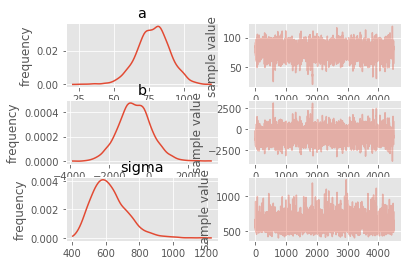

In [41]:
fig=fit.plot()

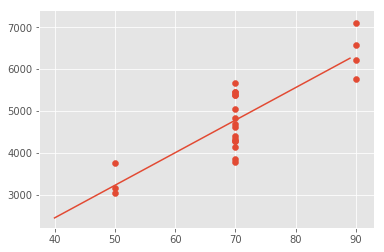

In [43]:
a=77.9
b=-672.9
x=np.arange(40,90,1)
y=a*x+b
plt.plot(x,y)
plt.scatter(df["space"],df["value"])